<a href="https://colab.research.google.com/github/VaggelisApostolou/auth-dws-ml-2025/blob/main/auth-dws-ml-2025/ML_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**


In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# **Μέρος 1**

## *Ερώτημα 1*

In [361]:
df = pd.read_csv('diabetes.csv')
print(df)
print(df.describe())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

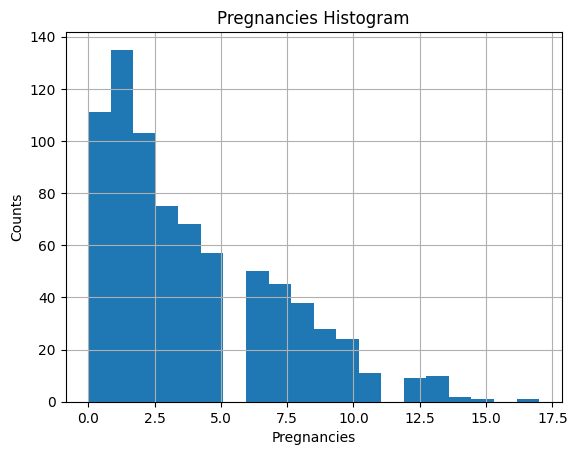

In [362]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

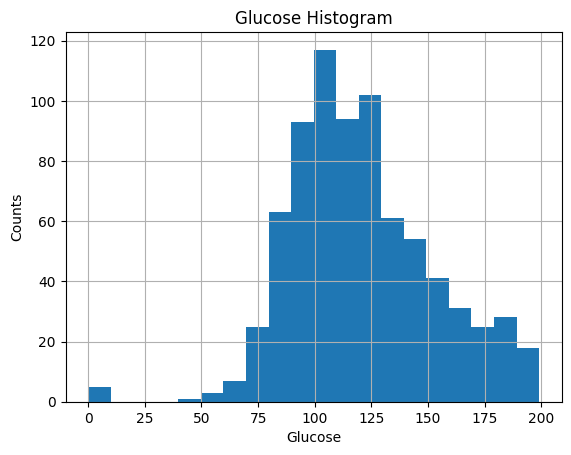

In [363]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

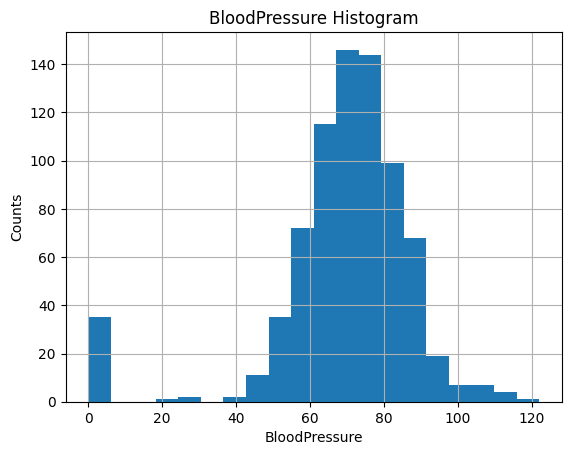

In [364]:
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

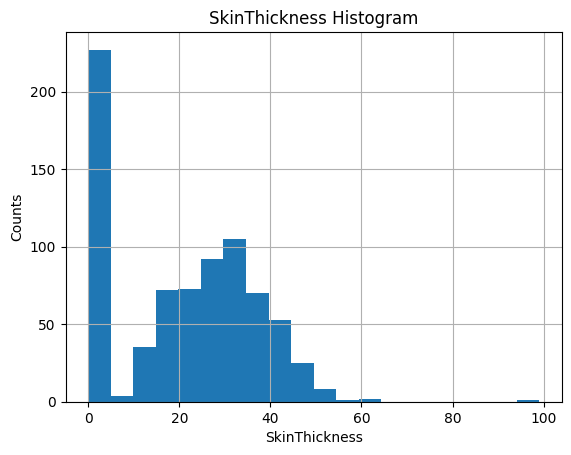

In [365]:
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

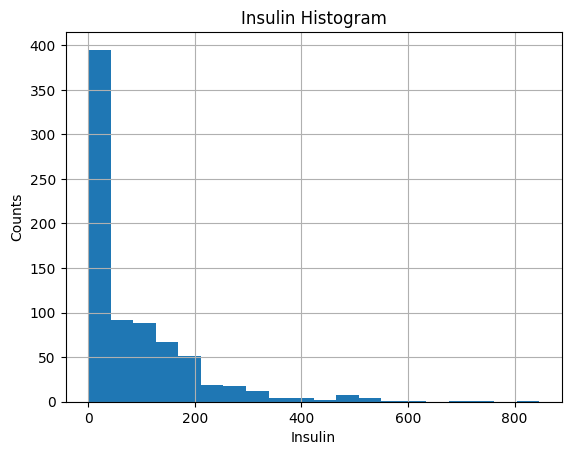

In [366]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

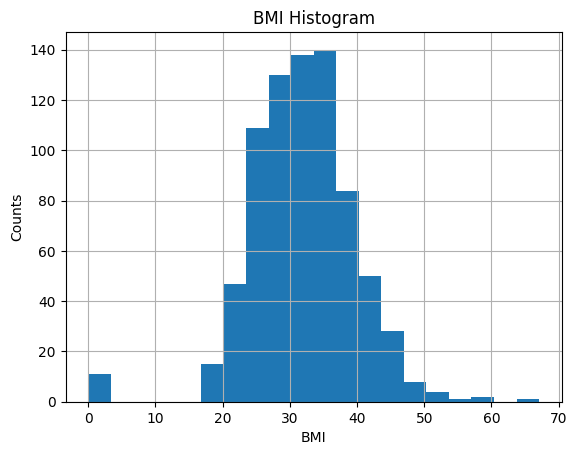

In [367]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

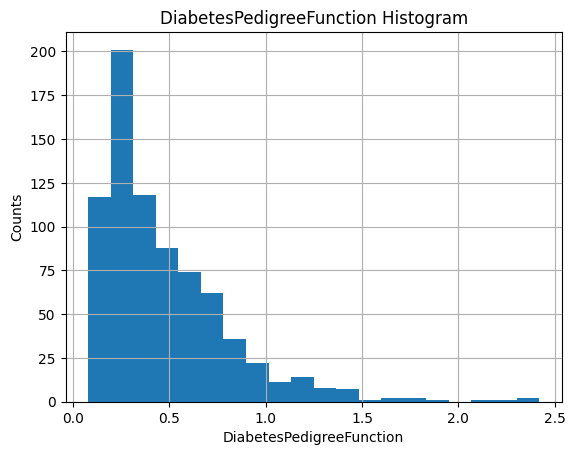

In [368]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

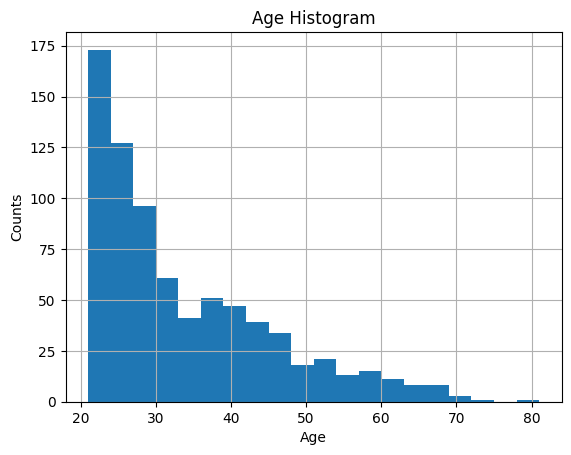

In [369]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

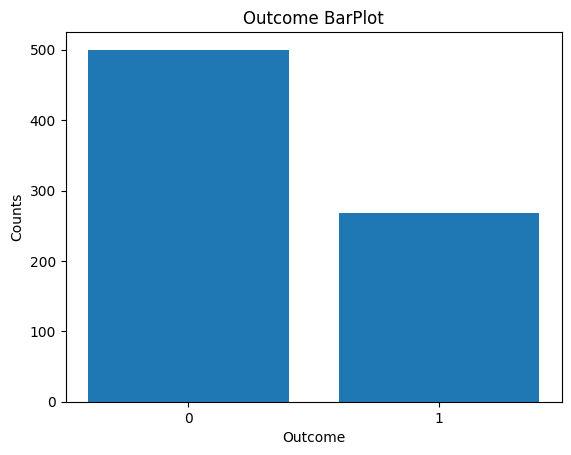

In [370]:
outcome_counts = df['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values)
plt.title('Outcome BarPlot')
plt.xlabel('Outcome')
plt.ylabel('Counts')
plt.xticks(outcome_counts.index)
plt.show()

## *Ερώτημα 2*

Θεωρώ πως η ποιότητα των δεδομένων είναι κακή, καθώς υπάρχουν αρκετές μη ρεαλιστικές τιμές μέσα σε αυτά, ενώ επίσης παρατηρείται μεγάλη τυπική απόκλιση σε κάποιες μετρήσεις. Συγκεκριμένα, ως μη ρεαλιστικές τιμές θα μπορούσαν να χαρακτηριστούν οι μηδενικές τιμές σε Glucose, BloodPresure, BMI και SkinThickness, αλλά και τα 17 Pregnancies ή το 67 BMI. Επιπλέον, η τυπική απόκλιση στη μέτρηση του Insulin (115.244002) είναι πολύ μεγάλη.

## *Ερώτημα 3*

Η κατανομή που ακολουθεί η μεταβλητή Age με βάση το ιστόγραμμα της είναι εκθετική, καθώς η πλειοψηφία των τιμών συγκεντρώνεται στις μικρές ηλικίες, ενώ η συχνότητα μειώνεται με την αύξηση της ηλικίας. Για την κατασκευή της συγκεκριμένης εφαρμογής η παραπάνω κατανομή είναι καλή διότι επικεντρώνεται στις νεότερες ηλικίες (20-40), όπου οι μετρήσεις τείνουν να είναι φυσιολογικές σε σύγκριση με μεγαλύτερες ηλικίες. Επίσης, οι πιθανοί χρήστες της εφαρμογής θα είναι άνθρωποι αυτών των ηλικιών που ελέγχουν την περίπτωση να έχουν διαβήτη με βάση τις εξετάσεις τους.

## *Ερώτημα 4*

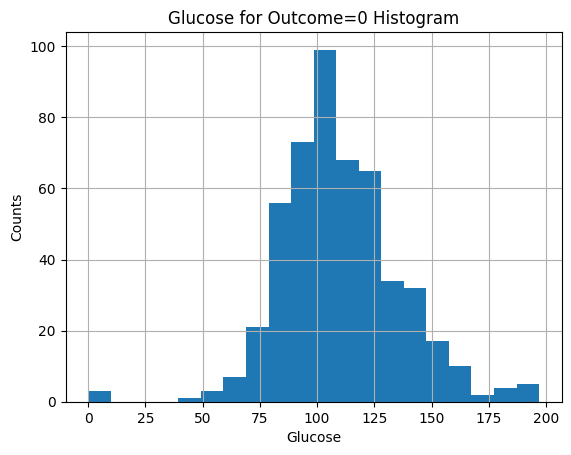

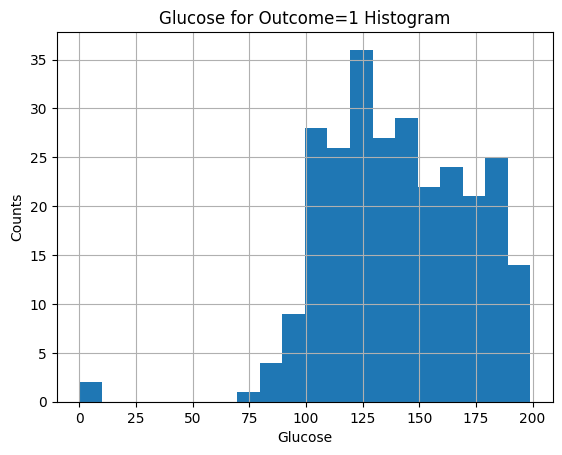

In [371]:
df[df['Outcome']==0]['Glucose'].hist(bins=20)
plt.title('Glucose for Outcome=0 Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

df[df['Outcome']==1]['Glucose'].hist(bins=20)
plt.title('Glucose for Outcome=1 Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

Αναλύοντας λίγο περισσότερο τα δεδομένα παρατηρείται πως όσοι εμφάνισαν Outcome ίσο με 1 είχαν κατά κύριο λόγο υψηλότερες μετρήσεις στη γλυκόζη. Συγκεκριμένα, παρατηρώντας τα ιστογράμματα γλυκόζης για όσους είχαν Outcome=0 και Outcome=1 είναι ευδιάκριτο ότι για όσους ήταν αρνητικοί στον διαβήτη οι μετρήσεις της γλυκόζης τους ήταν χαμηλότερες σε σχέση με εκείνους που ήταν θετικοί στον διαβήτη.

## *Ερώτημα 5*

In [372]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']
x = input_df.to_numpy()
y = targets_df.to_numpy()

In [373]:
seed = 0
validation_size = 0.3
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)
print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(537, 8) (231, 8) (537,) (231,)


## *Ερώτημα 6*

In [374]:
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'The accuracy in train set of the model is: {accuracy_percentage}')
y_pred = model.predict(x_validation)
accuracy = accuracy_score(y_validation, y_pred)
accuracy_percentage = round(accuracy*100, 2)
print(f'The accuracy in validation set of the model is: {accuracy_percentage}')

The accuracy in train set of the model is: 76.54
The accuracy in validation set of the model is: 77.92


Παρατηρείται ότι η ακρίβεια στο validation set είναι λίγο μεγαλύτερη σε σχέση με εκείνη στο train set. Αυτό δεν είναι λογικά συνηθισμένο, καθώς τα δεδομένα του train set είναι αυτά στα οποία κάνει fit το μοντέλο. Ωστόσο, η διαφορά είναι πολύ μικρή και μπορεί να προκύπτει από τη φύση των δεδομένων ή από τον τρόπο που διαχωρίστηκαν τα δύο σύνολα.

## *Ερώτημα 7*

In [375]:
input_df.columns
age_index = 7
mask_25 = x_validation[:, 7] <= 25

x_validation_25 = x_validation[mask_25]
y_validation_25 = y_validation[mask_25]
y_pred_25 = model.predict(x_validation_25)

accuracy = accuracy_score(y_validation_25, y_pred_25)
accuracy_percentage_25 = round(accuracy*100, 2)

In [376]:
mask_50 = (x_validation[:, 7] > 25) & (x_validation[:, 7] <= 50)

x_validation_50 = x_validation[mask_50]
y_validation_50 = y_validation[mask_50]
y_pred_50 = model.predict(x_validation_50)

accuracy = accuracy_score(y_validation_50, y_pred_50)
accuracy_percentage_50 = round(accuracy*100, 2)

In [377]:
mask_over50 = x_validation[:, 7] > 50

x_validation_over50 = x_validation[mask_over50]
y_validation_over50 = y_validation[mask_over50]
y_pred_over50 = model.predict(x_validation_over50)

accuracy = accuracy_score(y_validation_over50, y_pred_over50)
accuracy_percentage_over50 = round(accuracy*100, 2)


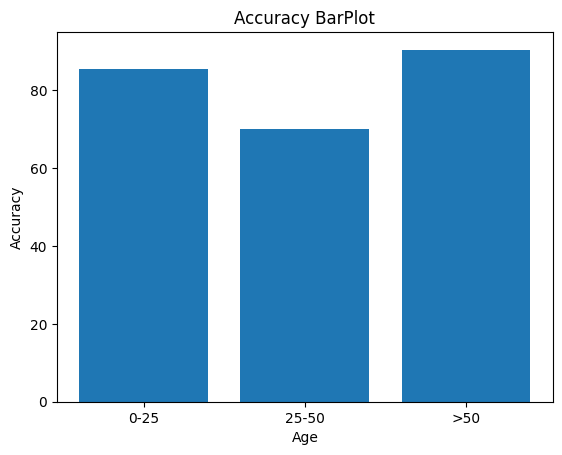

In [378]:
accuracy_index = ["0-25", "25-50", ">50"]
accuracy_list = [accuracy_percentage_25, accuracy_percentage_50, accuracy_percentage_over50]
plt.bar(accuracy_index, accuracy_list)
plt.title('Accuracy BarPlot')
plt.xlabel('Age')
plt.ylabel('Accuracy')
plt.show()

Ο ταξινομητής φαίνεται να αποδίδει καλύτερα στις κατηγορίες <=25 και >50.

## *Ερώτημα 8*

Θεωρώ ότι χειρότερο είναι ο ταξινομητής να προβλέπει πως ο ασθενής δεν έχει διαβήτη ενώ στην πραγματικότητα έχει, διότι οι πιθανότητες να προχωρήσει σε περαιτέρω εξετάσεις μειώνονται και δεν θα μάθει πως πάσχει από διαβήτη. Στην αντίθετη περίπτωση, εάν προβλέψει πως έχει διαβήτη ενώ δεν έχει, κατά πάσα πιθανότητα θα κάνει περισσότερες εξετάσεις με αποτέλεσμα να μάθει πως εν τέλει δεν πάσχει.

## *Ερώτημα 9*

In [379]:
for seed in range(10):
  x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)
  model = LogisticRegression(max_iter=1000, random_state=seed)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_train)
  accuracy = accuracy_score(y_train, y_pred)
  accuracy_percentage = round(accuracy*100, 2)
  print(f'The accuracy in train set of the model is: {accuracy_percentage}')
  y_pred = model.predict(x_validation)
  accuracy = accuracy_score(y_validation, y_pred)
  accuracy_percentage = round(accuracy*100, 2)
  print(f'The accuracy in validation set of the model is: {accuracy_percentage}')
  print()

The accuracy in train set of the model is: 76.54
The accuracy in validation set of the model is: 77.92

The accuracy in train set of the model is: 77.28
The accuracy in validation set of the model is: 78.35

The accuracy in train set of the model is: 78.58
The accuracy in validation set of the model is: 74.89

The accuracy in train set of the model is: 78.77
The accuracy in validation set of the model is: 75.32

The accuracy in train set of the model is: 75.98
The accuracy in validation set of the model is: 80.95

The accuracy in train set of the model is: 76.35
The accuracy in validation set of the model is: 78.35

The accuracy in train set of the model is: 76.91
The accuracy in validation set of the model is: 76.62

The accuracy in train set of the model is: 78.21
The accuracy in validation set of the model is: 77.92

The accuracy in train set of the model is: 77.84
The accuracy in validation set of the model is: 77.92

The accuracy in train set of the model is: 80.07
The accuracy in

## *Ερώτημα 10*

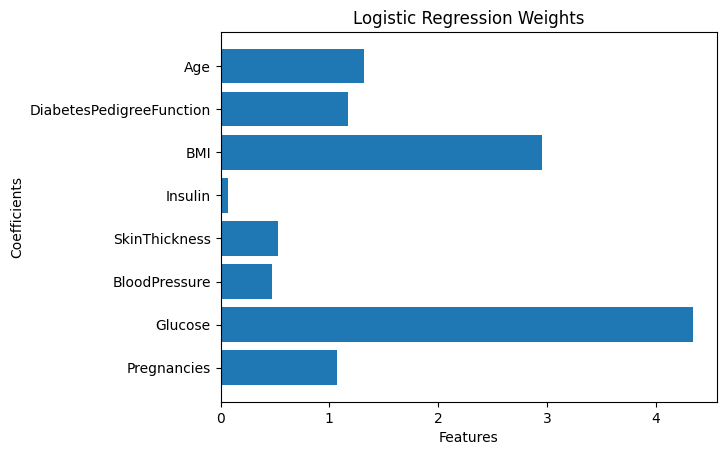

In [380]:
normalized = df.copy()
for column in df.columns.drop('Outcome'):
   normalized[column] = (normalized[column] - normalized[column].min()) / (normalized[column].max() - normalized[column].min())
input_normalized = normalized.drop(columns=['Outcome'])
targets_normalized = normalized['Outcome']
x = input_normalized.to_numpy()
y = targets_normalized.to_numpy()
seed = 0
validation_size = 0.3
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)
model = LogisticRegression(max_iter=1000, random_state=seed)
model.fit(x_train, y_train)
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_normalized.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


Μετά την κανονικοποίηση των δεδομένων παρατηρείται ότι οι 3 πιο σημαντικοί παράγοντες είναι κατά σειρά σημαντικότητας οι Glucose, BMI και Age.

# **Μέρος 2**

## *Ερώτημα 1*

In [381]:
input_df = df.drop(columns=['Glucose', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Outcome'])
targets_df = df['Glucose']
x = input_df.to_numpy()
y = targets_df.to_numpy()
seed = 0
validation_size = 0.3
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)
print(x_train.shape, x_validation.shape, y_train.shape, y_validation.shape)

(537, 4) (231, 4) (537,) (231,)


## *Ερώτημα 2*

In [382]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_validation)
mse_validation = mean_squared_error(y_validation, y_pred)
mae_validation = mean_absolute_error(y_validation, y_pred)
print(f'The Mean Squared Error in validation set of the model is: {mse_validation:.2f}')
print(f'The Mean Absolute Error in validation set of the model is: {mae_validation:.2f}')

The Mean Squared Error in validation set of the model is: 929.89
The Mean Absolute Error in validation set of the model is: 23.60


Θεωρώ πως η μετρική Mean Absolute Error είναι η καταλληλότερη, καθώς επιστρέφει ένα αρκετά πιο ρεαλιστικό αποτέλεσμα. Οι 23.60 μονάδες αποτελούν πάλι μεγάλη απόκλιση αλλά όχι τέτοια όσο εκείνη του Mean Squared Error, όπου άμα βάλουμε τετραγωνική ρίζα του MSE παίρνουμε περίπου 30.49.

## *Ερώτημα 3*

In [383]:
alpha = [0.2, 0.4, 0.6, 0.8, 1.0]
alpha_mae = []
for i in range(5):
  model = Lasso(alpha=alpha[i])
  model.fit(x_train, y_train)
  y_pred = model.predict(x_validation)
  mae_validation = mean_absolute_error(y_validation, y_pred)
  alpha_mae.append([alpha[i], mae_validation])
print(alpha_mae)

[[0.2, 23.594203291229192], [0.4, 23.58841532130485], [0.6, 23.58262934003747], [0.8, 23.576843358770088], [1.0, 23.571057628091296]]


## *Ερώτημα 4*

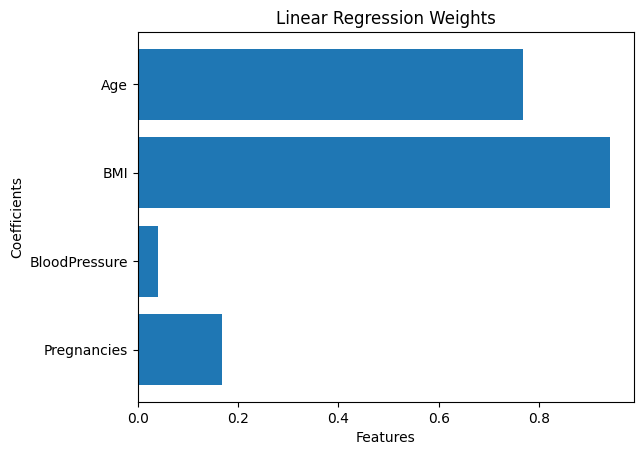

In [384]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_validation)
mae_validation = mean_absolute_error(y_validation, y_pred)
coeffs = model.coef_
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Linear Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()


In [385]:
input_df2 = input_df.drop(columns=['BloodPressure'])
targets_df = df['Glucose']
x = input_df2.to_numpy()
y = targets_df.to_numpy()
seed = 0
validation_size = 0.3
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=validation_size, random_state=seed)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_validation)
mae_validation = mean_absolute_error(y_validation, y_pred)
print(f'The Mean Absolute Error in validation set of the model is: {mae_validation:.2f}')

The Mean Absolute Error in validation set of the model is: 23.62


Παρατηρώ ότι το MEA μετά την αφαίρεση του BloodPressure είναι 23.62, ενώ στο ερώτημα 2 είναι 23.60. Επομένως, η αφαίρεση ακόμη και ενός στοιχείου με πολύ μικρή βαρύτητα επηρεάζει έστω και λίγο αρνητικά την μέτρηση του μοντέλου.